<Font color = 'FF7903'><h1><center>WhatsApp Chat Analysis</center></h1>
<img src=https://upload.wikimedia.org/wikipedia/commons/6/6b/WhatsApp.svg alt="Drawing" style="width: 200px;"/>


## <Font color = 'FF7903'>Chat Analysis from the date of Group Created(6/29/19) till 1/22/21.  

## <Font color = 'FF7903'>Importing required Library

In [693]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import *
import datetime as dt
from matplotlib.ticker import MaxNLocator
import regex
import emoji
from seaborn import *
from heatmap import heatmap
from wordcloud import WordCloud , STOPWORDS , ImageColorGenerator
from nltk import *
from plotly import express as px

## <Font color = 'FF7903'>Creating regex pattern to extracting Date from chat file.  

<b>It actually usese the concept of regex(regular expression) which play major role in these whole analysis.

In [627]:
def startsWithDateAndTime(s):
    # regex pattern for date.    
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9][0-9]), ([0-9]+):([0-9][0-9]) (AM|PM) -'
    result = re.match(pattern, s)
    if result:
        return True
    return False

## <Font color = 'FF7903'>Creating regex pattern to extracting the username of Author. 

In [628]:
# Finds username of any given format.
def FindAuthor(s):
    patterns = [
        '([\w]+):',                        # First Name
        '([\w]+[\s]+[\w]+):',              # First Name + Last Name
        '([\w]+[\s]+[\w]+[\s]+[\w]+):',    # First Name + Middle Name + Last Name
        '([+]\d{2} \d{5} \d{5}):',         # Mobile Number (India no.)
        '([+]\d{2} \d{3} \d{3} \d{4}):',   # Mobile Number (US no.)
        '([\w]+)[\u263a-\U0001f999]+:',    # Name and Emoji              
    ]
    pattern = '^' + '|'.join(patterns)
    result = re.match(pattern, s)
    if result:
        return True
    return False

## <Font color = 'FF7903'>Extracting date, time, author, message from the file.

In [629]:
def getDataPoint(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(': ') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

## <Font color = 'FF7903'>Finally extracting data and creating dataframe and storing data in dataframe. 

In [630]:
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
# Uploading exported chat file
conversationPath = 'WhatsApp Chat with TE Comp 20-21 Official.txt' # chat file
with open(conversationPath, encoding="utf-8") as fp:
    # Skipping first line of the file because contains information related to something about end-to-end encryption
    fp.readline() 
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)
   
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
# changing datatype of "Date" column.
df["Date"] = pd.to_datetime(df["Date"])

## <Font color = 'FF7903'>First look of our new born Dataset from file.

In [631]:
df

,Date,Time,Author,Message
0,2019-07-03,6:49 PM,None,Shubham Patil changed this group's icon
1,2019-06-29,2:31 PM,None,"Pranjali Jadhav created group ""SE Comp 2019-20..."
2,2019-07-03,8:18 AM,None,Pranjali Jadhav added you
3,2019-07-03,8:28 AM,None,"Pranjali Jadhav added Deepak, Shravani Naik, +..."
4,2019-07-03,8:37 AM,None,"Pranjali Jadhav added Shubham Patil, +91 72763..."
...,...,...,...,...
3040,2021-01-21,10:03 PM,None,Prasanna Shinde's security code changed. Tap f...
3041,2021-01-22,11:07 AM,+91 88309 56588,<Media omitted>
3042,2021-01-22,12:02 PM,None,+91 90492 67133's security code changed. Tap f...
3043,2021-01-22,1:53 PM,+91 94230 74157,Hello Grads!!! _Greetings from AptiTech Educat...


## <Font color = 'FF7903'>Checking shape of dataset. 

In [632]:
df.shape

(3045, 4)

## <Font color = 'FF7903'>Checking basic information of dataset. 

<b>Here in our dataset we have 3045 rows where in 'Author' column we have some Nan values so we have to handle the Nan values for better analysis. 

In [633]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3045 entries, 0 to 3044
Data columns (total 4 columns):
Date       3045 non-null datetime64[ns]
Time       3045 non-null object
Author     2517 non-null object
Message    3045 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 59.5+ KB


## <Font color = 'FF7903'>Checking no. of null values in dataset. 

In [634]:
df.isnull().sum()

Date         0
Time         0
Author     528
Message      0
dtype: int64

In [635]:
df.head(50)

,Date,Time,Author,Message
0,2019-07-03,6:49 PM,None,Shubham Patil changed this group's icon
1,2019-06-29,2:31 PM,None,"Pranjali Jadhav created group ""SE Comp 2019-20..."
2,2019-07-03,8:18 AM,None,Pranjali Jadhav added you
3,2019-07-03,8:28 AM,None,"Pranjali Jadhav added Deepak, Shravani Naik, +..."
4,2019-07-03,8:37 AM,None,"Pranjali Jadhav added Shubham Patil, +91 72763..."
5,2019-07-03,8:41 AM,None,"Pranjali Jadhav added Charuli, Saurabh Waje, +..."
6,2019-07-03,9:33 AM,None,+91 75176 40160 left
7,2019-07-05,5:12 PM,None,"Deepak, Shravani Naik, and +91 70388 28311 was..."
8,2019-07-09,5:00 PM,Saurabh Waje,"Hii there, our official gmail group of se comp..."
9,2019-07-09,5:01 PM,Saurabh Waje,mcoerc-se-comp2019-20@googlegroups.com This is...


In [636]:
df.tail(50)

,Date,Time,Author,Message
2995,2021-01-06,7:16 PM,None,Abhishek Ghorpade's security code changed. Tap...
2996,2021-01-09,11:15 AM,Antapurkar Mam,Dear Students online lecture series will conti...
2997,2021-01-09,12:17 PM,None,Bharati's security code changed. Tap for more ...
2998,2021-01-09,12:26 PM,None,Bharati's security code changed. Tap for more ...
2999,2021-01-09,2:29 PM,None,Bharati's security code changed. Tap for more ...
3000,2021-01-09,3:24 PM,+91 94230 74157,https://forms.gle/3Gx5SdMVd1FCZmUE7
3001,2021-01-09,3:24 PM,+91 94230 74157,This is free online training available for stu...
3002,2021-01-09,6:28 PM,+91 94230 74157,*Free Webinar on Scope of Industrial Automatio...
3003,2021-01-09,6:29 PM,+91 94230 74157,https://forms.gle/3Gx5SdMVd1FCZmUE7
3004,2021-01-09,6:34 PM,+91 94230 74157,This is free online training available for stu...


<b>From the above datafram we conclude that None value at author is nothing but a alert when someone joined or removed the group.  

## <Font color = 'FF7903'>Droping Nan values. 

In [637]:
df = df.dropna()

In [638]:
df = df.reset_index(drop=True)

In [639]:
df.shape

(2517, 4)

## <Font color = 'FF7903'>Checking no. of author's in group. 

In [640]:
df['Author'].nunique()

104

## <Font color = 'FF7903'>Authors present in group. 

In [641]:
df['Author'].unique()

array(['Saurabh Waje', 'Pranjali Jadhav', 'Yash Kevalramani',
       'Antapurkar Mam', '+91 86230 70942', 'Snehal Patil',
       'Mrunali Naik', 'Dhiraj Bari', 'Supriya Mahajan', 'Deepak',
       '+91 95185 39882', 'Shubham Dhage', 'Manisha Butkar',
       '+91 75888 27384', 'Abhijit Chavan', 'Aparna', 'Jay Sharma',
       'Bharati', 'Gayatri Kadam', 'Rajendra Nagare', '+91 83780 67461',
       'Ashutosh Mali', '+91 75075 42207', '+91 91583 86084',
       'Prachi Chikhale', 'Omkar Khute', '+91 90213 92751', 'Pooja',
       '+91 91565 47327', 'Samarth', '+91 94230 74157', '+91 94213 03162',
       'Samadhan Shinde', 'Kalyani', 'Dipali Nagare', 'Shravani Naik',
       'Mokshini', 'Chaskar Prasad', 'Akshda', '+91 77209 47219',
       'Prasanna Shinde', 'Charuli', 'Priti Rahane', '+91 77095 30672',
       '+91 96236 39269', '+91 95456 76626', '+91 98225 11799',
       'Akshata Patil', 'Ronil Patil', '+91 76667 53343',
       '+91 89754 48105', 'Abhishek Ghorpade', 'Sanket Bhavar',
       '

## <Font color = 'FF7903'>Adding one more column of 'Day' in dataset for better analysis. 

<b>It is using python datetime library using which we are easily detecting 'Day' at particular 'Date'.

In [644]:
weeks = {
    0 : 'Monday',
    1 : 'Tuesday',
    2 : 'Wednesday',
    3 : 'Thrusday',
    4 : 'Friday',
    5 : 'Saturday',
    6 : 'Sunday'
}
df['Day'] = df['Date'].dt.weekday.map(weeks)

## <Font color = 'FF7903'>Rearranging the columns of dataframe    

In [646]:
df = df[['Date','Day','Time','Author','Message']]

In [647]:
df['Day'] = df['Day'].astype('category')

In [649]:
df.head()

,Date,Day,Time,Author,Message
0,2019-07-09,Tuesday,5:00 PM,Saurabh Waje,"Hii there, our official gmail group of se comp..."
1,2019-07-09,Tuesday,5:01 PM,Saurabh Waje,mcoerc-se-comp2019-20@googlegroups.com This is...
2,2019-07-09,Tuesday,5:26 PM,Saurabh Waje,⚠️⚠️ Those who didn't given ur email add to ad...
3,2019-07-12,Friday,11:52 AM,Pranjali Jadhav,Dear Students Please do not leave campus witho...
4,2019-07-12,Friday,9:00 PM,Pranjali Jadhav,<Media omitted>


## <Font color = 'FF7903'>Function to count no. of letters and words in particular message. 

In [650]:
df['Letter\'s'] = df['Message'].apply(lambda s : len(s))          # Count number of letters in each message
df['Word\'s'] = df['Message'].apply(lambda s : len(s.split(' ')))   # Count number of word's in each message

In [652]:
df.dtypes

Date        datetime64[ns]
Day               category
Time                object
Author              object
Message             object
Letter's             int64
Word's               int64
dtype: object

## <Font color = 'FF7903'>Updated Dataframe 

In [653]:
df

,Date,Day,Time,Author,Message,Letter's,Word's
0,2019-07-09,Tuesday,5:00 PM,Saurabh Waje,"Hii there, our official gmail group of se comp...",137,15
1,2019-07-09,Tuesday,5:01 PM,Saurabh Waje,mcoerc-se-comp2019-20@googlegroups.com This is...,60,5
2,2019-07-09,Tuesday,5:26 PM,Saurabh Waje,⚠️⚠️ Those who didn't given ur email add to ad...,97,20
3,2019-07-12,Friday,11:52 AM,Pranjali Jadhav,Dear Students Please do not leave campus witho...,66,11
4,2019-07-12,Friday,9:00 PM,Pranjali Jadhav,<Media omitted>,15,2
...,...,...,...,...,...,...,...
2512,2021-01-21,Thrusday,2:50 PM,+91 94230 74157,<Media omitted>,15,2
2513,2021-01-21,Thrusday,2:50 PM,+91 94230 74157,https://meet.google.com/boi-evfs-pwp,36,1
2514,2021-01-22,Friday,11:07 AM,+91 88309 56588,<Media omitted>,15,2
2515,2021-01-22,Friday,1:53 PM,+91 94230 74157,Hello Grads!!! _Greetings from AptiTech Educat...,373,59


## <Font color = 'FF7903'>Function to count number of links in messages. 

<b>It will add one extra column as well named as 'Url_Count' which count the number of links available in particular message.

In [654]:
URLPATTERN = r'(https?://\S+)'
df['Url_Count'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
links = np.sum(df.Url_Count)

## <Font color = 'FF7903'>Function to count number of media in Chat. 

<b>It will add one extra column as well named as 'Media_Count' which count the number of Media available in particular message.

In [655]:
MEDIAPATTERN = r'<Media omitted>'
df['Media_Count'] = df.Message.apply(lambda x : re.findall(MEDIAPATTERN, x)).str.len()
media = np.sum(df.Media_Count)

In [659]:
print('No. of links available in chat : {}\nNo. of Media messages available in chat : {}'.format(links,media))

No. of links available in chat : 307
No. of Media messages available in chat : 421


## <Font color = 'FF7903'>Updated Dataframe 

In [190]:
df

,Date,Day,Time,Author,Message,Letter's,Word's,Url_Count,Media_Count
0,2019-07-09,Tuesday,5:00 PM,Saurabh Waje,"Hii there, our official gmail group of se comp...",137,15,1,0
1,2019-07-09,Tuesday,5:01 PM,Saurabh Waje,mcoerc-se-comp2019-20@googlegroups.com This is...,60,5,0,0
2,2019-07-09,Tuesday,5:26 PM,Saurabh Waje,⚠️⚠️ Those who didn't given ur email add to ad...,97,20,0,0
3,2019-07-12,Friday,11:52 AM,Pranjali Jadhav,Dear Students Please do not leave campus witho...,66,11,0,0
4,2019-07-12,Friday,9:00 PM,Pranjali Jadhav,<Media omitted>,15,2,0,1
...,...,...,...,...,...,...,...,...,...
2512,2021-01-21,Thrusday,2:50 PM,+91 94230 74157,<Media omitted>,15,2,0,1
2513,2021-01-21,Thrusday,2:50 PM,+91 94230 74157,https://meet.google.com/boi-evfs-pwp,36,1,1,0
2514,2021-01-22,Friday,11:07 AM,+91 88309 56588,<Media omitted>,15,2,0,1
2515,2021-01-22,Friday,1:53 PM,+91 94230 74157,Hello Grads!!! _Greetings from AptiTech Educat...,373,59,1,0


## <Font color = 'FF7903'>Basic Statistics 

In [191]:
total_messages = df.shape[0]
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
links = np.sum(df.Url_Count)

In [192]:
print('Group Chatting Stats : ')
print('Total Number of Messages : {}'.format(total_messages))
print('Total Number of Media Messages : {}'.format(media_messages))
print('Total Number of Links : {}'.format(links))

Group Chatting Stats : 
Total Number of Messages : 2517
Total Number of Media Messages : 421
Total Number of Links : 307


## <Font color = 'FF7903'>Extracting Basic Statistics of each Author. 

In [570]:
l = df.Author.unique()

for i in range(len(l)):
  # Filtering out messages of particular user
  req_df = df[df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'--> Stats of {l[i]} <-- ')
    
  # shape will print number of rows which indirectly means the number of messages
  print('Total Message Sent : ', req_df.shape[0])
    
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word\'s']))/req_df.shape[0]
  w_p_m = ("%.3f" % round(words_per_message, 2))  
  print('Average Words per Message : ', w_p_m)

  #media conists of media messages
  media = sum(req_df["Media_Count"])
  print('Total Media Message Sent : ', media)
    
  #links consist of total links
  links = sum(req_df["Url_Count"])   
  print('Total Links Sent : ', links)   
  print()
  print('----------------------------------------------------------\n')  

--> Stats of Saurabh Waje <-- 
Total Message Sent :  19
Average Words per Message :  11.790
Total Media Message Sent :  3
Total Links Sent :  1

----------------------------------------------------------

--> Stats of Pranjali Jadhav <-- 
Total Message Sent :  221
Average Words per Message :  13.920
Total Media Message Sent :  60
Total Links Sent :  11

----------------------------------------------------------

--> Stats of Yash Kevalramani <-- 
Total Message Sent :  66
Average Words per Message :  5.760
Total Media Message Sent :  9
Total Links Sent :  3

----------------------------------------------------------

--> Stats of Antapurkar Mam <-- 
Total Message Sent :  99
Average Words per Message :  14.480
Total Media Message Sent :  17
Total Links Sent :  10

----------------------------------------------------------

--> Stats of +91 86230 70942 <-- 
Total Message Sent :  2
Average Words per Message :  5.500
Total Media Message Sent :  1
Total Links Sent :  0

---------------------

Total Links Sent :  0

----------------------------------------------------------

--> Stats of +91 74996 78574 <-- 
Total Message Sent :  2
Average Words per Message :  2.000
Total Media Message Sent :  0
Total Links Sent :  0

----------------------------------------------------------

--> Stats of +91 90221 97820 <-- 
Total Message Sent :  5
Average Words per Message :  4.800
Total Media Message Sent :  0
Total Links Sent :  0

----------------------------------------------------------

--> Stats of +91 96656 24396 <-- 
Total Message Sent :  3
Average Words per Message :  2.670
Total Media Message Sent :  0
Total Links Sent :  0

----------------------------------------------------------

--> Stats of +91 75073 21727 <-- 
Total Message Sent :  3
Average Words per Message :  6.330
Total Media Message Sent :  0
Total Links Sent :  0

----------------------------------------------------------

--> Stats of +91 94036 83531 <-- 
Total Message Sent :  3
Average Words per Message :  3.000


## <Font color = 'FF7903'>Total Words in Chat

In [194]:
text = ' '.join(review for review in df.Message)
print ("Total words in Chat : {}".format(len(text)))

Total words in Chat : 224990


# <Font color = 'FF7903'>Creating Word Cloud of mostly used word's in Chat.

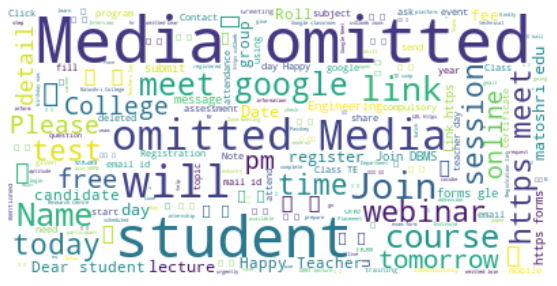

In [197]:
# Word Cloud of mostly used word in our Group
text = " ".join(review for review in df.Message)
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)
  # Display the generated image:
  # the matplotlib way:
  
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## <Font color = 'FF7903'>Overall No. of Messages sent by particular Author in group. 

In [198]:
# Creates a list of unique Authors
l = df.Author.unique()

for i in range(len(l)):
  # Filtering out messages of particular user
  req_df = df[df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(l[i],'  ->  ',req_df.shape[0])


Saurabh Waje   ->   19
Pranjali Jadhav   ->   221
Yash Kevalramani   ->   66
Antapurkar Mam   ->   99
+91 86230 70942   ->   2
Snehal Patil   ->   5
Mrunali Naik   ->   28
Dhiraj Bari   ->   15
Supriya Mahajan   ->   1
Deepak   ->   23
+91 95185 39882   ->   105
Shubham Dhage   ->   9
Manisha Butkar   ->   115
+91 75888 27384   ->   2
Abhijit Chavan   ->   7
Aparna   ->   1
Jay Sharma   ->   86
Bharati   ->   30
Gayatri Kadam   ->   19
Rajendra Nagare   ->   22
+91 83780 67461   ->   12
Ashutosh Mali   ->   55
+91 75075 42207   ->   5
+91 91583 86084   ->   20
Prachi Chikhale   ->   11
Omkar Khute   ->   32
+91 90213 92751   ->   16
Pooja   ->   18
+91 91565 47327   ->   18
Samarth   ->   25
+91 94230 74157   ->   428
+91 94213 03162   ->   21
Samadhan Shinde   ->   36
Kalyani   ->   15
Dipali Nagare   ->   10
Shravani Naik   ->   1
Mokshini   ->   11
Chaskar Prasad   ->   8
Akshda   ->   15
+91 77209 47219   ->   9
Prasanna Shinde   ->   10
Charuli   ->   10
Priti Rahane   ->   14
+91

## <Font color = 'FF7903'>Overall No. of Messages sent on each Day of Week. 

In [199]:
l = df.Day.unique()

for i in range(len(l)):
  # Filtering out messages of particular user
  req_df = df[df["Day"] == l[i]]
  # req_df will contain messages of only one particular user
  print(l[i],'  ->  ',req_df.shape[0])

Tuesday   ->   352
Friday   ->   569
Thrusday   ->   419
Monday   ->   374
Wednesday   ->   401
Saturday   ->   245
Sunday   ->   157


In [200]:
l = df.Time.unique()

for i in range(len(l)):
  # Filtering out messages of particular user
  req_df = df[df["Time"] == l[i]]
  # req_df will contain messages of only one particular user
  print(l[i],'  ->  ',req_df.shape[0])

5:00 PM   ->   4
5:01 PM   ->   1
5:26 PM   ->   4
11:52 AM   ->   2
9:00 PM   ->   4
10:29 PM   ->   3
12:42 PM   ->   3
12:44 PM   ->   3
12:46 PM   ->   3
3:55 PM   ->   3
1:59 PM   ->   3
4:29 PM   ->   3
7:57 PM   ->   5
12:57 PM   ->   6
8:32 AM   ->   3
10:50 AM   ->   5
8:51 AM   ->   3
3:04 PM   ->   2
11:32 AM   ->   4
6:52 PM   ->   5
6:13 PM   ->   4
6:14 PM   ->   4
8:52 PM   ->   4
8:53 PM   ->   1
8:59 PM   ->   3
2:49 PM   ->   3
3:03 PM   ->   1
12:26 PM   ->   7
2:19 PM   ->   5
2:24 PM   ->   4
9:48 AM   ->   3
1:25 PM   ->   5
1:26 PM   ->   6
2:05 PM   ->   2
3:10 PM   ->   2
2:58 PM   ->   3
4:28 PM   ->   2
8:30 PM   ->   2
5:59 PM   ->   2
6:00 PM   ->   2
6:02 PM   ->   6
7:40 PM   ->   1
10:23 AM   ->   13
11:12 PM   ->   1
11:37 AM   ->   2
10:59 PM   ->   1
11:01 PM   ->   2
11:02 PM   ->   1
1:27 PM   ->   6
2:20 PM   ->   2
2:23 PM   ->   7
2:47 PM   ->   2
4:51 PM   ->   2
8:43 AM   ->   4
3:35 PM   ->   4
6:59 PM   ->   2
1:07 AM   ->   1
8:16 AM   ->   

7:34 PM   ->   1
9:18 PM   ->   3
10:04 PM   ->   3
5:47 PM   ->   4
11:53 AM   ->   3
11:54 AM   ->   3
10:56 PM   ->   1
6:03 PM   ->   4
12:36 AM   ->   1
4:33 PM   ->   4
4:39 PM   ->   3
4:52 PM   ->   2
7:17 AM   ->   1
4:03 PM   ->   2
10:18 PM   ->   1
10:32 PM   ->   10
10:15 AM   ->   9
7:42 AM   ->   3
12:23 AM   ->   1
12:47 PM   ->   2
10:37 AM   ->   2
2:37 PM   ->   2
4:06 PM   ->   1
4:59 PM   ->   3
5:20 PM   ->   3
6:56 PM   ->   3
7:28 PM   ->   3
7:36 PM   ->   2
7:55 PM   ->   3
8:05 PM   ->   1
8:09 PM   ->   2
8:17 PM   ->   1
8:19 PM   ->   1
8:23 PM   ->   2
8:41 PM   ->   2
9:08 PM   ->   1
9:11 PM   ->   2
9:50 PM   ->   3
10:22 PM   ->   8
10:23 PM   ->   1
11:05 PM   ->   1
8:18 AM   ->   1
9:29 AM   ->   1
10:08 AM   ->   8
10:46 PM   ->   2
6:28 PM   ->   7
9:54 PM   ->   3
9:56 PM   ->   3
5:32 PM   ->   3
5:43 PM   ->   2
6:04 PM   ->   4
10:26 PM   ->   1
10:33 PM   ->   4
10:35 PM   ->   1
11:35 AM   ->   5
12:50 PM   ->   2
3:50 PM   ->   1
4:46 PM  

# <Font color = 'FF7903'>EDA on Dataset

## <Font color = 'FF7903'>Visual Representation of Mostly active member of group.

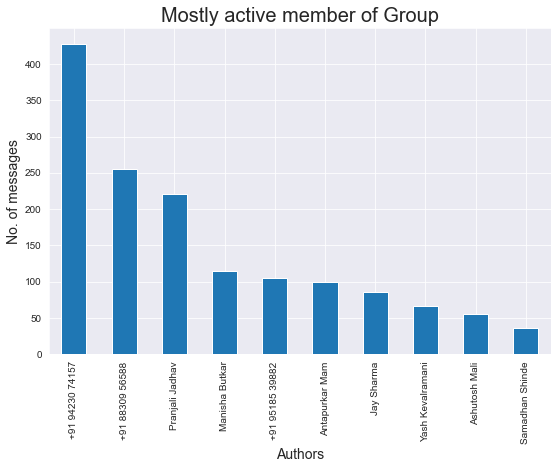

In [671]:
# Mostly Active Author in the Group
plt.figure(figsize=(9,6))
mostly_active = df['Author'].value_counts()
# Top 10 peoples that are mostly active in our Group is : 
m_a = mostly_active.head(10)
m_a.plot.bar()
plt.xlabel('Authors',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Mostly active member of Group',fontdict={'fontsize': 20,'fontweight': 8})
plt.show()

## <Font color = 'FF7903'>Mostly active day of week. 

<b>Most number of messages are sent on 'Friday'. 'Thrusday' and 'Wednesday' doesn't seem to have much difference in no. of messages.   

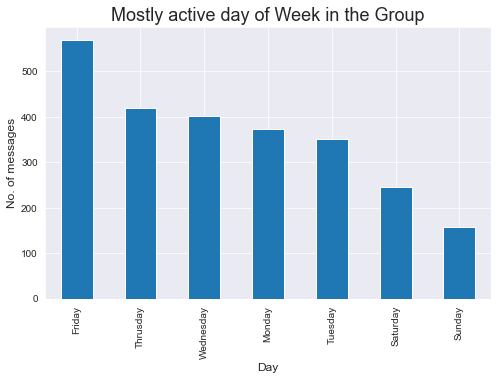

In [674]:
# Mostly Active day in the Group
plt.figure(figsize=(8,5))
active_day = df['Day'].value_counts()
# Top 10 peoples that are mostly active in our Group is : 
a_d = active_day.head(10)
a_d.plot.bar()
plt.xlabel('Day',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Mostly active day of Week in the Group',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

## <Font color = 'FF7903'>Top-10 visual media contributor of Group. 

<b>Media is a most powerful entity on earth so let's see who is top visual media contributor of this Group.

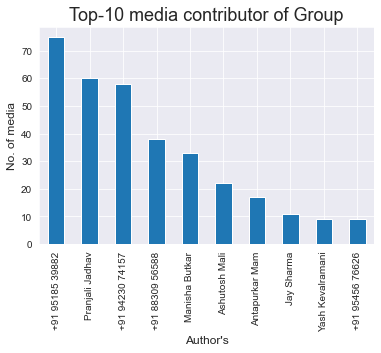

In [678]:
# Top-10 Media Contributor of Group
mm = df[df['Message'] == '<Media omitted>']
mm1 = mm['Author'].value_counts()
top10 = mm1.head(10)
top10.plot.bar()
plt.xlabel('Author\'s',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of media',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Top-10 media contributor of Group',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

## <Font color = 'FF7903'>Top-10 Author who uses max no. of words in there messages.  

<b>Words are most powerful weapon in the world so lets check who has this powerful weapon in this Group😅

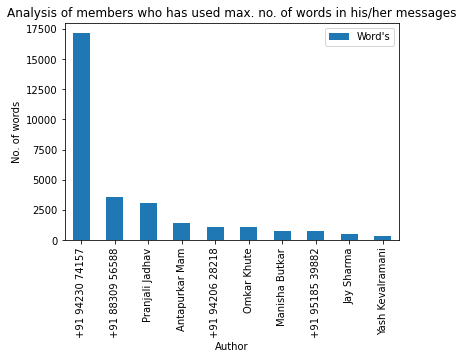

In [204]:
# Words are most powerful weapon in the world so lets check who has this powerful weapon in this Group 
max_words = df[['Author','Word\'s']].groupby('Author').sum()
m_w = max_words.sort_values('Word\'s',ascending=False).head(10)
m_w.plot.bar(rot=90)
plt.xlabel('Author')
plt.ylabel('No. of words')
plt.title('Analysis of members who has used max. no. of words in his/her messages')
plt.show()

## <Font color = 'FF7903'>Top-10 Authors who has shared max no. of links in Group. 

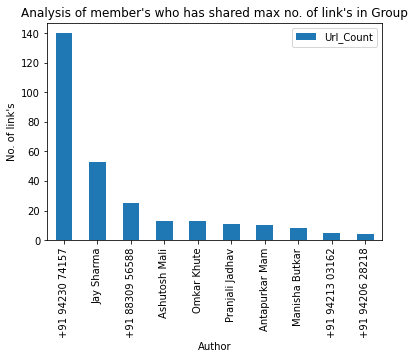

In [205]:
# Member who has shared max numbers of link in Group 
max_words = df[['Author','Url_Count']].groupby('Author').sum()
m_w = max_words.sort_values('Url_Count',ascending=False).head(10)
m_w.plot.bar(rot=90)
plt.xlabel('Author')
plt.ylabel('No. of link\'s')
plt.title('Analysis of member\'s who has shared max no. of link\'s in Group')
plt.show()

## <Font color = 'FF7903'>Time whenever Group having high traffic. 

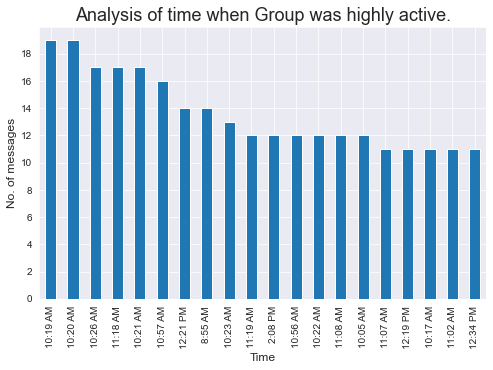

In [680]:
# Time whenever our group is mostly active
plt.figure(figsize=(8,5))
t = df['Time'].value_counts().head(20)
tx = t.plot.bar()
tx.yaxis.set_major_locator(MaxNLocator(integer=True))  #Converting y axis data to integer
plt.xlabel('Time',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Analysis of time when Group was highly active.',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

## <Font color = 'FF7903'>Converting 12 hour formate to 24 Hours.  

In [683]:
# Converting 12 hour formate to 24 hour.
lst = []
for i in df['Time'] : 
    out_time = datetime.strftime(datetime.strptime(i,"%I:%M %p"),"%H:%M")
    lst.append(out_time)

In [684]:
df['24H_Time'] = lst

### <Font color = 'FF7903'>Updated Dataset. 

In [685]:
df

,Date,Day,Time,Author,Message,Letter's,Word's,Url_Count,Media_Count,24H_Time
0,2019-07-09,Tuesday,5:00 PM,Saurabh Waje,"Hii there, our official gmail group of se comp...",137,15,1,0,17:00
1,2019-07-09,Tuesday,5:01 PM,Saurabh Waje,mcoerc-se-comp2019-20@googlegroups.com This is...,60,5,0,0,17:01
2,2019-07-09,Tuesday,5:26 PM,Saurabh Waje,⚠️⚠️ Those who didn't given ur email add to ad...,97,20,0,0,17:26
3,2019-07-12,Friday,11:52 AM,Pranjali Jadhav,Dear Students Please do not leave campus witho...,66,11,0,0,11:52
4,2019-07-12,Friday,9:00 PM,Pranjali Jadhav,<Media omitted>,15,2,0,1,21:00
...,...,...,...,...,...,...,...,...,...,...
2512,2021-01-21,Thrusday,2:50 PM,+91 94230 74157,<Media omitted>,15,2,0,1,14:50
2513,2021-01-21,Thrusday,2:50 PM,+91 94230 74157,https://meet.google.com/boi-evfs-pwp,36,1,1,0,14:50
2514,2021-01-22,Friday,11:07 AM,+91 88309 56588,<Media omitted>,15,2,0,1,11:07
2515,2021-01-22,Friday,1:53 PM,+91 94230 74157,Hello Grads!!! _Greetings from AptiTech Educat...,373,59,1,0,13:53


In [686]:
df['Hours'] = df['24H_Time'].apply(lambda x : x.split(':')[0])

##  <Font color = 'FF7903'>Most suitable hour of day, whenever there will more chances of getting responce from group members.

<b>ex. Here 10 means time between 10:00 to 10:59.

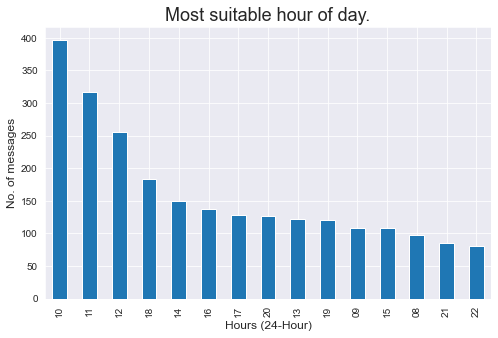

In [688]:
# Most suitable hour of day, whenever there will more chances of getting responce from group members.
plt.figure(figsize=(8,5))
std_time = df['Hours'].value_counts().head(15)
s_T = std_time.plot.bar()
s_T.yaxis.set_major_locator(MaxNLocator(integer=True))  #Converting y axis data to integer
plt.xlabel('Hours (24-Hour)',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Most suitable hour of day.',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

## <Font color = 'FF7903'>Mostly used words of top-10 highly active member of Group.

--- Author :  +91 94230 74157 --- 


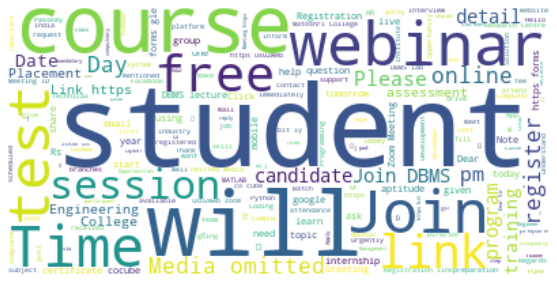

____________________________________________________________________________________

--- Author :  +91 88309 56588 --- 


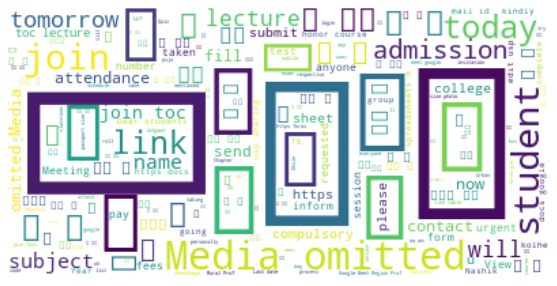

____________________________________________________________________________________

--- Author :  Pranjali Jadhav --- 


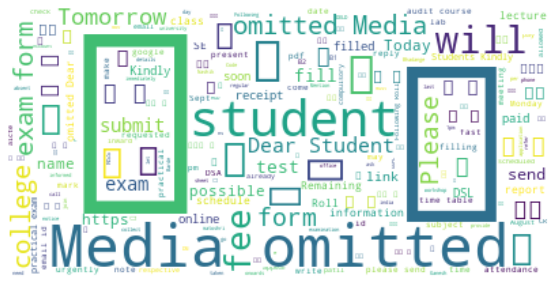

____________________________________________________________________________________

--- Author :  Manisha Butkar --- 


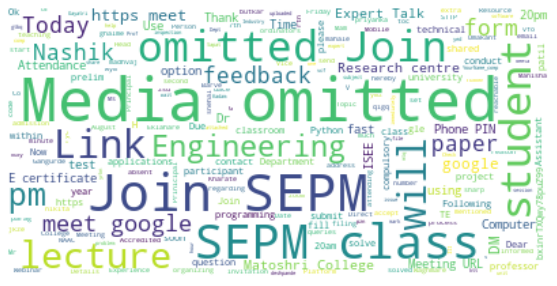

____________________________________________________________________________________

--- Author :  +91 95185 39882 --- 


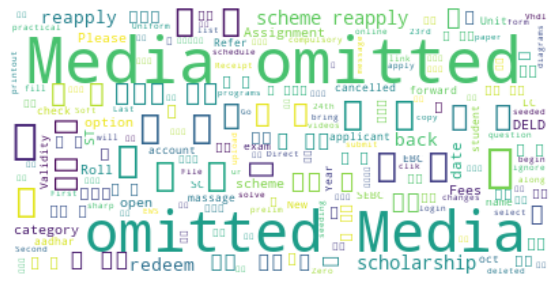

____________________________________________________________________________________

--- Author :  Antapurkar Mam --- 


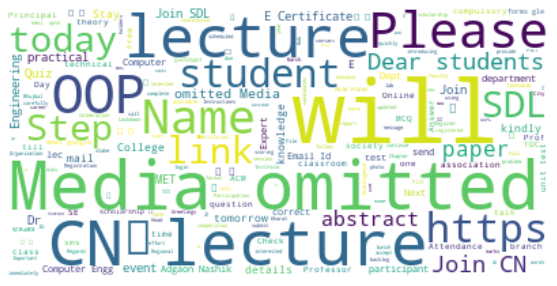

____________________________________________________________________________________

--- Author :  Jay Sharma --- 


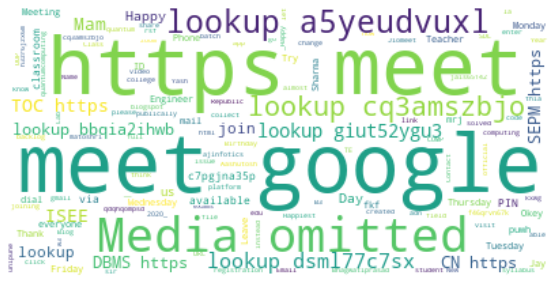

____________________________________________________________________________________

--- Author :  Yash Kevalramani --- 


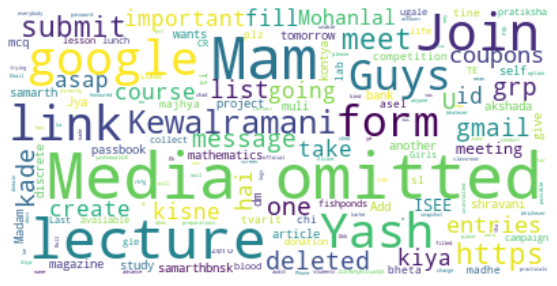

____________________________________________________________________________________

--- Author :  Ashutosh Mali --- 


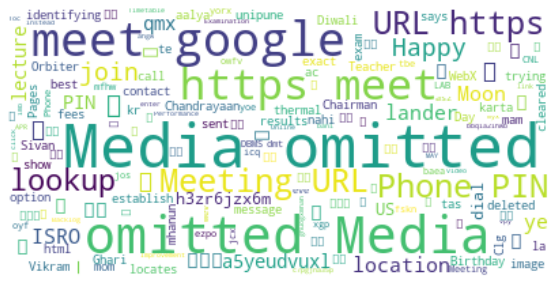

____________________________________________________________________________________

--- Author :  Samadhan Shinde --- 


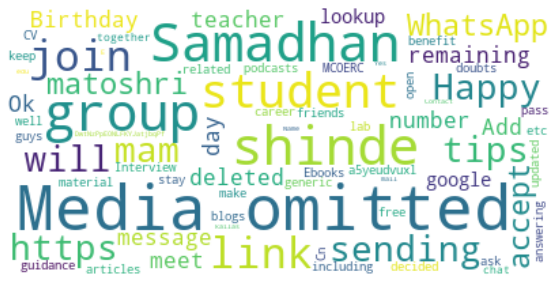

____________________________________________________________________________________



In [690]:
active_m = ['+91 94230 74157','+91 88309 56588','Pranjali Jadhav','Manisha Butkar','+91 95185 39882','Antapurkar Mam',
           'Jay Sharma','Yash Kevalramani','Ashutosh Mali','Samadhan Shinde']

for i in range(len(active_m)) :
    # Filtering out messages of particular user
    m_chat = df[df["Author"] == active_m[i]]
    print(f'--- Author :  {active_m[i]} --- ')
    # Word Cloud of mostly used word in our Group
    msg = ' '.join(x for x in m_chat.Message)
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(msg)

    plt.figure(figsize=(10,5))
    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    print('____________________________________________________________________________________\n')

## <Font color = 'FF7903'>Date on which Group was highly active. 

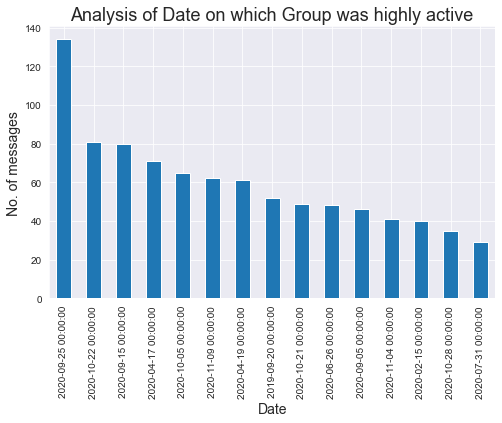

In [709]:
# Date on which our Group was highly active.
plt.figure(figsize=(8,5))
df['Date'].value_counts().head(15).plot.bar()
plt.xlabel('Date',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Analysis of Date on which Group was highly active',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

### <Font color = 'FF7903'>Updated Dataset 

In [215]:
df

,Date,Day,Time,Author,Message,Letter's,Word's,Url_Count,Media_Count,24H_Time,Hours
0,2019-07-09,Tuesday,5:00 PM,Saurabh Waje,"Hii there, our official gmail group of se comp...",137,15,1,0,17:00,17
1,2019-07-09,Tuesday,5:01 PM,Saurabh Waje,mcoerc-se-comp2019-20@googlegroups.com This is...,60,5,0,0,17:01,17
2,2019-07-09,Tuesday,5:26 PM,Saurabh Waje,⚠️⚠️ Those who didn't given ur email add to ad...,97,20,0,0,17:26,17
3,2019-07-12,Friday,11:52 AM,Pranjali Jadhav,Dear Students Please do not leave campus witho...,66,11,0,0,11:52,11
4,2019-07-12,Friday,9:00 PM,Pranjali Jadhav,<Media omitted>,15,2,0,1,21:00,21
...,...,...,...,...,...,...,...,...,...,...,...
2512,2021-01-21,Thrusday,2:50 PM,+91 94230 74157,<Media omitted>,15,2,0,1,14:50,14
2513,2021-01-21,Thrusday,2:50 PM,+91 94230 74157,https://meet.google.com/boi-evfs-pwp,36,1,1,0,14:50,14
2514,2021-01-22,Friday,11:07 AM,+91 88309 56588,<Media omitted>,15,2,0,1,11:07,11
2515,2021-01-22,Friday,1:53 PM,+91 94230 74157,Hello Grads!!! _Greetings from AptiTech Educat...,373,59,1,0,13:53,13


## <Font color = 'FF7903'>Analysis of no. of messages using Time Series Plot. 

In [694]:
z = df['Date'].value_counts() 
z1 = z.to_dict() #converts to dictionary
df['Msg_count'] = df['Date'].map(z1)

In [695]:
# Timeseries plot 
fig = px.line(x=df['Date'],y=df['Msg_count'])
fig.update_layout(title='Analysis of number of message\'s using TimeSeries plot.',
                  xaxis_title='Month',
                  yaxis_title='No. of Messages')
fig.update_xaxes(nticks=20)
fig.show()

### <Font color = 'FF7903'>Adding one more column as Year for  better analysis. 

In [696]:
df['Year'] = df['Date'].dt.year

### <Font color = 'FF7903'>Updated Dataset

In [697]:
df

,Date,Day,Time,Author,Message,Letter's,Word's,Url_Count,Media_Count,24H_Time,Hours,Msg_count,Year
0,2019-07-09,Tuesday,5:00 PM,Saurabh Waje,"Hii there, our official gmail group of se comp...",137,15,1,0,17:00,17,3,2019
1,2019-07-09,Tuesday,5:01 PM,Saurabh Waje,mcoerc-se-comp2019-20@googlegroups.com This is...,60,5,0,0,17:01,17,3,2019
2,2019-07-09,Tuesday,5:26 PM,Saurabh Waje,⚠️⚠️ Those who didn't given ur email add to ad...,97,20,0,0,17:26,17,3,2019
3,2019-07-12,Friday,11:52 AM,Pranjali Jadhav,Dear Students Please do not leave campus witho...,66,11,0,0,11:52,11,4,2019
4,2019-07-12,Friday,9:00 PM,Pranjali Jadhav,<Media omitted>,15,2,0,1,21:00,21,4,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,2021-01-21,Thrusday,2:50 PM,+91 94230 74157,<Media omitted>,15,2,0,1,14:50,14,3,2021
2513,2021-01-21,Thrusday,2:50 PM,+91 94230 74157,https://meet.google.com/boi-evfs-pwp,36,1,1,0,14:50,14,3,2021
2514,2021-01-22,Friday,11:07 AM,+91 88309 56588,<Media omitted>,15,2,0,1,11:07,11,3,2021
2515,2021-01-22,Friday,1:53 PM,+91 94230 74157,Hello Grads!!! _Greetings from AptiTech Educat...,373,59,1,0,13:53,13,3,2021


## <Font color = 'FF7903'>Adding Month column in dataset for better analysis. 

In [698]:
df['Mon'] = df['Date'].dt.month

In [699]:
months = {
     1 : 'Jan',
     2 : 'Feb',
     3 : 'Mar',
     4 : 'Apr',
     5 : 'May',
     6 : 'Jun',
     7 : 'Jul',
     8 : 'Aug',
     9 : 'Sep',
    10 : 'Oct',
    11 : 'Nov',
    12 : 'Dec'
}
df['Month'] = df['Mon'].map(months)

In [700]:
df.drop('Mon',axis=1,inplace=True)

## <Font color = 'FF7903'>Updated Dataset

In [701]:
df

,Date,Day,Time,Author,Message,Letter's,Word's,Url_Count,Media_Count,24H_Time,Hours,Msg_count,Year,Month
0,2019-07-09,Tuesday,5:00 PM,Saurabh Waje,"Hii there, our official gmail group of se comp...",137,15,1,0,17:00,17,3,2019,Jul
1,2019-07-09,Tuesday,5:01 PM,Saurabh Waje,mcoerc-se-comp2019-20@googlegroups.com This is...,60,5,0,0,17:01,17,3,2019,Jul
2,2019-07-09,Tuesday,5:26 PM,Saurabh Waje,⚠️⚠️ Those who didn't given ur email add to ad...,97,20,0,0,17:26,17,3,2019,Jul
3,2019-07-12,Friday,11:52 AM,Pranjali Jadhav,Dear Students Please do not leave campus witho...,66,11,0,0,11:52,11,4,2019,Jul
4,2019-07-12,Friday,9:00 PM,Pranjali Jadhav,<Media omitted>,15,2,0,1,21:00,21,4,2019,Jul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,2021-01-21,Thrusday,2:50 PM,+91 94230 74157,<Media omitted>,15,2,0,1,14:50,14,3,2021,Jan
2513,2021-01-21,Thrusday,2:50 PM,+91 94230 74157,https://meet.google.com/boi-evfs-pwp,36,1,1,0,14:50,14,3,2021,Jan
2514,2021-01-22,Friday,11:07 AM,+91 88309 56588,<Media omitted>,15,2,0,1,11:07,11,3,2021,Jan
2515,2021-01-22,Friday,1:53 PM,+91 94230 74157,Hello Grads!!! _Greetings from AptiTech Educat...,373,59,1,0,13:53,13,3,2021,Jan


## <Font color = 'FF7903'>Combining Month and Year column. 

In [702]:
df["Month_Year"] = df.apply(lambda x : x["Month"] + " " + str(x["Year"]), axis=1)

## <Font color = 'FF7903'>Updated Dataset 

In [703]:
df.head(30)

,Date,Day,Time,Author,Message,Letter's,Word's,Url_Count,Media_Count,24H_Time,Hours,Msg_count,Year,Month,Month_Year
0,2019-07-09,Tuesday,5:00 PM,Saurabh Waje,"Hii there, our official gmail group of se comp...",137,15,1,0,17:00,17,3,2019,Jul,Jul 2019
1,2019-07-09,Tuesday,5:01 PM,Saurabh Waje,mcoerc-se-comp2019-20@googlegroups.com This is...,60,5,0,0,17:01,17,3,2019,Jul,Jul 2019
2,2019-07-09,Tuesday,5:26 PM,Saurabh Waje,⚠️⚠️ Those who didn't given ur email add to ad...,97,20,0,0,17:26,17,3,2019,Jul,Jul 2019
3,2019-07-12,Friday,11:52 AM,Pranjali Jadhav,Dear Students Please do not leave campus witho...,66,11,0,0,11:52,11,4,2019,Jul,Jul 2019
4,2019-07-12,Friday,9:00 PM,Pranjali Jadhav,<Media omitted>,15,2,0,1,21:00,21,4,2019,Jul,Jul 2019
5,2019-07-12,Friday,9:00 PM,Pranjali Jadhav,Tomorrow's time table,21,3,0,0,21:00,21,4,2019,Jul,Jul 2019
6,2019-07-12,Friday,10:29 PM,Yash Kevalramani,This message was deleted,24,4,0,0,22:29,22,4,2019,Jul,Jul 2019
7,2019-07-19,Friday,12:42 PM,Saurabh Waje,<Media omitted>,15,2,0,1,12:42,12,5,2019,Jul,Jul 2019
8,2019-07-19,Friday,12:44 PM,Saurabh Waje,This message was deleted,24,4,0,0,12:44,12,5,2019,Jul,Jul 2019
9,2019-07-19,Friday,12:46 PM,Saurabh Waje,This message was deleted,24,4,0,0,12:46,12,5,2019,Jul,Jul 2019


In [712]:
l = df.Month_Year.unique()
print('No. of messages sent in particular month.\n')
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df = df[df["Month_Year"] == l[i]]
  # req_df will contain messages of only one particular user
  print(l[i],'  ->  ',req_df.shape[0])   

No. of messages sent in particular month.

Jul 2019   ->   20
Aug 2019   ->   55
Sep 2019   ->   140
Oct 2019   ->   99
Nov 2019   ->   27
Dec 2019   ->   44
Jan 2020   ->   65
Feb 2020   ->   159
Mar 2020   ->   72
Apr 2020   ->   155
May 2020   ->   66
Jun 2020   ->   80
Jul 2020   ->   140
Aug 2020   ->   135
Sep 2020   ->   440
Oct 2020   ->   360
Nov 2020   ->   231
Dec 2020   ->   170
Jan 2021   ->   59


## <Font color = 'FF7903'>Mostly active Month.

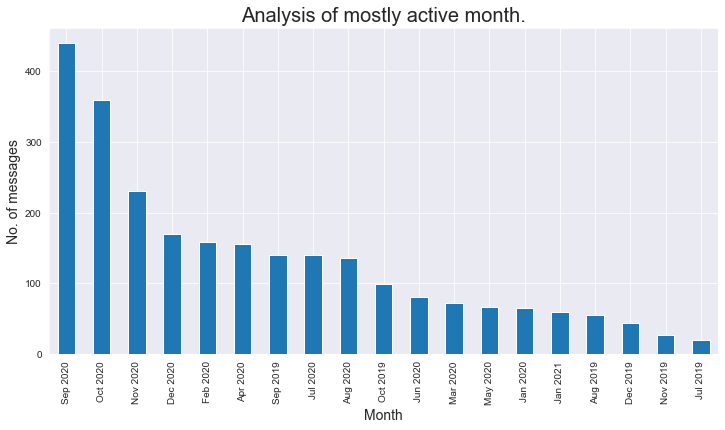

In [342]:
# Mostly Active month 
plt.figure(figsize=(12,6))
active_month = df['Month_Year'].value_counts()
a_m = active_month
a_m.plot.bar()
plt.xlabel('Month',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Analysis of mostly active month.',fontdict={'fontsize': 20,
        'fontweight': 8})
plt.show()

## <Font color = 'FF7903'>Calculating no. of messages sent in each month. 

In [705]:
z = df['Month_Year'].value_counts() 
z1 = z.to_dict() #converts to dictionary
df['Msg_count_monthly'] = df['Month_Year'].map(z1)

## <Font color = 'FF7903'>Updated Dataset 

In [706]:
df

,Date,Day,Time,Author,Message,Letter's,Word's,Url_Count,Media_Count,24H_Time,Hours,Msg_count,Year,Month,Month_Year,Msg_count_monthly
0,2019-07-09,Tuesday,5:00 PM,Saurabh Waje,"Hii there, our official gmail group of se comp...",137,15,1,0,17:00,17,3,2019,Jul,Jul 2019,20
1,2019-07-09,Tuesday,5:01 PM,Saurabh Waje,mcoerc-se-comp2019-20@googlegroups.com This is...,60,5,0,0,17:01,17,3,2019,Jul,Jul 2019,20
2,2019-07-09,Tuesday,5:26 PM,Saurabh Waje,⚠️⚠️ Those who didn't given ur email add to ad...,97,20,0,0,17:26,17,3,2019,Jul,Jul 2019,20
3,2019-07-12,Friday,11:52 AM,Pranjali Jadhav,Dear Students Please do not leave campus witho...,66,11,0,0,11:52,11,4,2019,Jul,Jul 2019,20
4,2019-07-12,Friday,9:00 PM,Pranjali Jadhav,<Media omitted>,15,2,0,1,21:00,21,4,2019,Jul,Jul 2019,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,2021-01-21,Thrusday,2:50 PM,+91 94230 74157,<Media omitted>,15,2,0,1,14:50,14,3,2021,Jan,Jan 2021,59
2513,2021-01-21,Thrusday,2:50 PM,+91 94230 74157,https://meet.google.com/boi-evfs-pwp,36,1,1,0,14:50,14,3,2021,Jan,Jan 2021,59
2514,2021-01-22,Friday,11:07 AM,+91 88309 56588,<Media omitted>,15,2,0,1,11:07,11,3,2021,Jan,Jan 2021,59
2515,2021-01-22,Friday,1:53 PM,+91 94230 74157,Hello Grads!!! _Greetings from AptiTech Educat...,373,59,1,0,13:53,13,3,2021,Jan,Jan 2021,59


## <Font color = 'FF7903'>Analysis of mostly active month using Line Plot. 

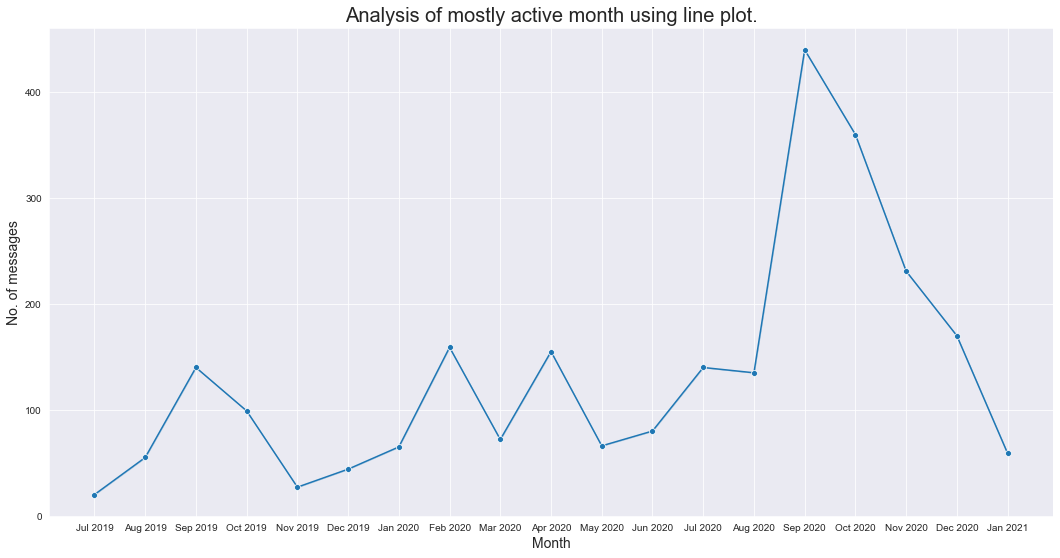

In [707]:
plt.figure(figsize=(18,9))
sns.set_style("darkgrid")
sns.lineplot(data=df,x='Month_Year',y='Msg_count_monthly',markers=True,marker='o')
plt.xlabel('Month',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Analysis of mostly active month using line plot.',fontdict={'fontsize': 20,'fontweight': 8})
plt.show()
plt.show()

## <Font color = 'FF7903'>Mostly active year whenever max. no. of messages sent. 

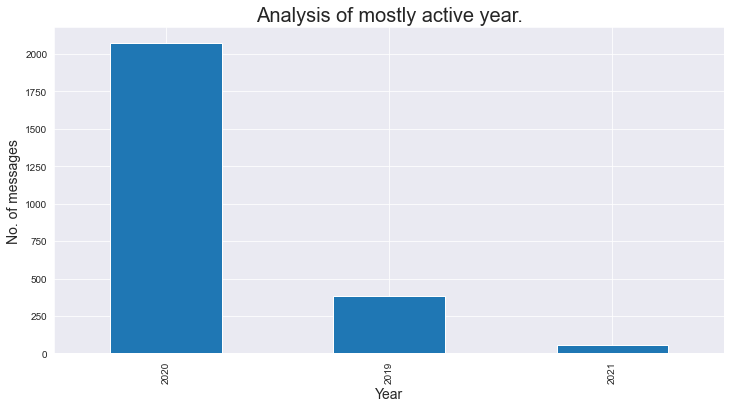

In [353]:
#Total message per year
# As we analyse that the group is created in mid 2019 thats why number of messages in 2019 is less.
plt.figure(figsize=(12,6))
active_month = df['Year'].value_counts()
a_m = active_month
a_m.plot.bar()
plt.xlabel('Year',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Analysis of mostly active year.',fontdict={'fontsize': 20,'fontweight': 8})
plt.show()

# <Font color = 'FF7903'>Analysis of Day and Time when our Group was highly active 

In [602]:
df2 = df.groupby(['Hours', 'Day'], as_index=False)["Message"].count()

In [603]:
df2 = df2.dropna()

In [604]:
df2.reset_index(drop = True,inplace = True)

In [605]:
df2

,Hours,Day,Message
0,00,Monday,1.0
1,00,Saturday,3.0
2,00,Sunday,3.0
3,00,Thrusday,4.0
4,00,Wednesday,4.0
...,...,...,...
125,23,Saturday,6.0
126,23,Sunday,7.0
127,23,Thrusday,5.0
128,23,Tuesday,3.0


In [456]:
# Analysing on which time group is mostly active based on hours and day.
analysis_2_df = df.groupby(['Hours', 'Day'], as_index=False)["Message"].count()
#Droping null values
analysis_2_df.dropna(inplace=True)

In [500]:
analysis_2_df.sort_values(by=['Message'],ascending=False)

,Hours,Day,Message
69,10,Wednesday,95.0
64,10,Monday,80.0
67,10,Thrusday,76.0
76,11,Wednesday,76.0
74,11,Thrusday,71.0
...,...,...,...
32,05,Thrusday,1.0
143,21,Sunday,1.0
41,06,Wednesday,1.0
43,07,Monday,1.0


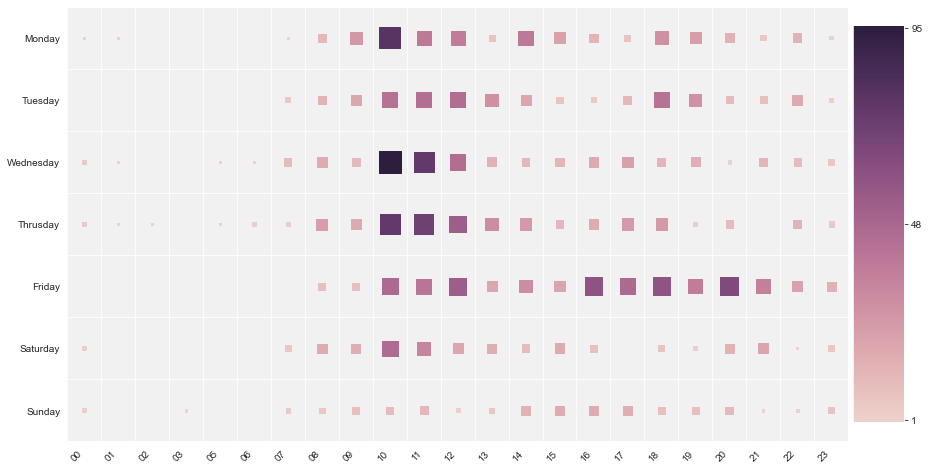

In [503]:
day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thrusday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(15,8))
heatmap(
    x=analysis_2_df['Hours'],
    y=analysis_2_df['Day'],
    size_scale = 500,
    size = analysis_2_df['Message'], 
    y_order = day_of_week[::-1],
    color = analysis_2_df['Message'], 
    palette = sns.cubehelix_palette(128)
)
plt.show()

<b>From the above plot we analyse that on 'Monday' between 10:00 to 10:59, group was highly active. Similarly on 'Wednesday' b/w 10:00 to 10:59 group was highly active. Between 00:00 to 08:00 the group was less active.

<Font color='FF031D'><center>Made with ❤ by Ronil</center>